In [1]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
from geopandas import GeoSeries
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import geopandas as gpd

In [8]:
!pip install descartes

In [4]:
tik_district = {
    1: 'Адмиралтейский',
    2: 'Василеостровский',
    3: 'Кировский',
    4: 'Красногвардейский',
    5: 'Невский',
    6: 'Красносельский',
    7: 'Кировский',
    8: 'Петродворцовый',
    9: 'Приморский',
    10: 'Выборгский',
    11: 'Калининский',
    12: 'Приморский',
    13: 'Курортный',
    14: 'Выборгский',
    15: 'Кронштадский',
    16: 'Центральный',
    17: 'Калининский',
    18: 'Петроградский',
    19: 'Московский',
    20: 'Пушкинский',
    21: 'Колпинский',
    22: 'Выборгский',
    23: 'Фрунзенский',
    24: 'Невский',
    25: 'Красногвардейский',
    26: 'Красносельский',
    27: 'Московский',
    28: 'Приморский',
    29: 'Фрунзенский',
    30: 'Центральный'
}

In [5]:
resulting_df = pd.read_csv('collected_data.csv')
resulting_df.head(15)

,-,Сумма,Территориальная избирательная комиссия №1,Территориальная избирательная комиссия №2,Территориальная избирательная комиссия №3,Территориальная избирательная комиссия №4,Территориальная избирательная комиссия №5,Территориальная избирательная комиссия №6,Территориальная избирательная комиссия №7,Территориальная избирательная комиссия №8,...,Территориальная избирательная комиссия №22,Территориальная избирательная комиссия №23,Территориальная избирательная комиссия №24,Территориальная избирательная комиссия №25,Территориальная избирательная комиссия №26,Территориальная избирательная комиссия №27,Территориальная избирательная комиссия №28,Территориальная избирательная комиссия №29,Территориальная избирательная комиссия №30,Цифровые избирательные участки
0,"Число избирателей, внесенных в список избирате...",3814877,105510,147015,101715,122638,255414,173058,147651,84723,...,137381,136998,126000,138569,127787,89318,175819,162685,67326,535
1,"Число избирательных бюллетеней, полученных уча...",3230784,83250,134200,89950,95400,238300,150600,119741,65630,...,118500,118943,99450,105200,112255,72800,147450,147500,56200,402
2,"Число избирательных бюллетеней, выданных избир...",1103056,31626,44897,26315,35273,66733,42586,42452,29626,...,42458,34606,32796,38572,32123,21522,46640,44832,20334,402
3,"Число избирательных бюллетеней, выданных избир...",43989,1592,1836,762,2048,1600,693,742,909,...,2172,4019,788,1642,1440,622,1226,5227,1279,0
4,Число погашенных избирательных бюллетеней,2083724,50032,87467,62873,58079,169967,107321,76547,35095,...,73865,80314,65866,64986,78692,50656,99582,97441,34587,0
5,"Число избирательных бюллетеней, содержащихся в...",43883,1590,1831,762,2040,1598,691,728,909,...,2172,4012,787,1636,1440,622,1226,5212,1277,0
6,"Число избирательных бюллетеней, содержащихся в...",1096726,31437,44713,26169,35159,66561,42536,41990,29596,...,42302,33566,32645,38353,32077,21492,46513,44275,20244,400
7,Число недействительных избирательных бюллетеней,30795,1220,1355,845,1064,1796,1094,1079,1110,...,1214,1290,789,1032,985,688,1006,1693,682,3
8,Число действительных избирательных бюллетеней,1109814,31807,45189,26086,36135,66363,42133,41639,29395,...,43260,36288,32643,38957,32532,21426,46733,47794,20839,397
9,Число утраченных избирательных бюллетеней,30,0,0,0,0,0,0,0,0,...,10,4,0,0,0,0,2,0,0,0


In [6]:
# объединяем ТИК, относящиеся к одному району для отображения на карте
def merging_tiks(df:pd.DataFrame, tik_district:dict)->pd.DataFrame:
    resulted_dict = {}
    resulted_dict['-'] = df['-'].values
    resulted_dict['Сумма'] = df['Сумма'].values
    
    for tik in tik_district:
        if tik not in resulted_dict:
            resulted_dict[tik_district[tik]] = df[f'Территориальная избирательная комиссия №{tik}'].values
        else:
            temp_arr = resulted_dict[tik_district[tik]][:11] + df[f'Территориальная избирательная комиссия №{tik}'].values[:11]
            
            temp_arr = np.append(temp_arr, None)
            
            for i in range(3):
                split = resulted_dict[tik_district[tik]][12+i].split(' ')
                val_1 = int(split[0])
                
                split_2 = df[f'Территориальная избирательная комиссия №{tik}'].values[12+i].split(' ')
                val_2 = int(split_2[0])
                
                temp_arr = np.append(temp_arr, f'{val_1+val_2} {(val_1+val_2)/sum(temp_arr[7:9])}%')
            
            resulted_dict[tik_district[tik]] = temp_arr
    resulted_df = pd.DataFrame(resulted_dict)
    return resulted_df

disctrict_df = merging_tiks(df=resulting_df, tik_district=tik_district)
disctrict_df.head(15)

,-,Сумма,Адмиралтейский,Василеостровский,Кировский,Красногвардейский,Невский,Красносельский,Петродворцовый,Приморский,Выборгский,Калининский,Курортный,Кронштадский,Центральный,Петроградский,Московский,Пушкинский,Колпинский,Фрунзенский
0,"Число избирателей, внесенных в список избирате...",3814877,105510,147015,147651,138569,126000,127787,84723,175819,137381,146526,47955,35191,67326,94434,89318,153988,142586,162685
1,"Число избирательных бюллетеней, полученных уча...",3230784,83250,134200,119741,105200,99450,112255,65630,147450,118500,124050,40450,27750,56200,67559,72800,127072,126350,147500
2,"Число избирательных бюллетеней, выданных избир...",1103056,31626,44897,42452,38572,32796,32123,29626,46640,42458,40926,17519,13329,20334,47349,21522,50143,40477,44832
3,"Число избирательных бюллетеней, выданных избир...",43989,1592,1836,742,1642,788,1440,909,1226,2172,746,1506,752,1279,1314,622,1875,1070,5227
4,Число погашенных избирательных бюллетеней,2083724,50032,87467,76547,64986,65866,78692,35095,99582,73865,82378,21424,13669,34587,18896,50656,75054,84803,97441
5,"Число избирательных бюллетеней, содержащихся в...",43883,1590,1831,728,1636,787,1440,909,1226,2172,746,1506,752,1277,1314,622,1875,1043,5212
6,"Число избирательных бюллетеней, содержащихся в...",1096726,31437,44713,41990,38353,32645,32077,29596,46513,42302,40590,17506,13327,20244,46600,21492,50033,40425,44275
7,Число недействительных избирательных бюллетеней,30795,1220,1355,1079,1032,789,985,1110,1006,1214,1146,556,394,682,1076,688,1558,947,1693
8,Число действительных избирательных бюллетеней,1109814,31807,45189,41639,38957,32643,32532,29395,46733,43260,40190,18456,13685,20839,46838,21426,50350,40521,47794
9,Число утраченных избирательных бюллетеней,30,0,0,0,0,0,0,0,2,10,1,1,0,0,0,0,0,0,0


In [8]:
def get_polygon(name)->Polygon:
    soup = BeautifulSoup(open(r"{}.xml".format(name), encoding='utf-8'), "html.parser")
    coords = []
    for way in tqdm(soup.find_all('member')):

        xml_way = f"https://www.openstreetmap.org/api/0.6/way/{way['ref']}"
        response = requests.get(xml_way).text
        way_soup = BeautifulSoup(response)

        for node in way_soup.find_all('nd'):
            xml_node = f"https://www.openstreetmap.org/api/0.6/node/{node['ref']}"
            response_node = requests.get(xml_node).text
            node_soup = BeautifulSoup(response_node)
            lat = node_soup.find('node')['lat']
            lon = node_soup.find('node')['lon']
            coords.append((float(lon), float(lat)))
    return Polygon(coords)

In [10]:
polygon_list = []
i = 0
for col in disctrict_df.columns[2:-1]:
    i+=1
    polygon_list.append(get_polygon(col))
    if i==2:
        break

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:48<00:00,  1.79s/it]


In [11]:
geo = gpd.GeoDataFrame({'name': ['a', 'b'],
                        'vals': [2,1],
                       'geometry':polygon_list})

<AxesSubplot:>

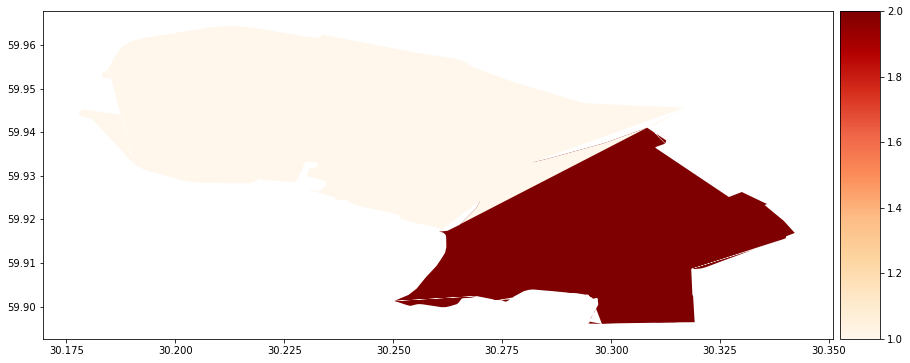

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo.plot(column='vals', cmap='OrRd', linewidth=0.8, ax=ax, legend=True, cax=cax)

In [25]:
len(disctrict_df.columns)

20

In [26]:
YAVKA = []
columns = resulting_df.columns
for i in range(2, 20):
    YAVKA.append(round((int(disctrict_df.iloc[7, i])+ int(disctrict_df.iloc[8, i])) / int(disctrict_df.iloc[0, i])*100, 1) )

In [65]:
cand_names = [resulting_df.iloc[12+i, 0] for i in range(3)]

WINNER = []
columns = resulting_df.columns
for i in range(2, 20):
    WINNER.append(cand_names[np.argmax( np.array(list(map(lambda x: int(x.split(' ')[0]), disctrict_df.iloc[12:15, i].values))) )])

In [66]:
PERC_WIN = []
for i in range(2, 20):
    PERC_WIN.append(float(disctrict_df.iloc[13, i].split(' ')[1][:-1]))

In [67]:
distr_name = [disctrict_df.columns[i] for i in range(2,20)]

In [68]:
disctict_geodf = gpd.GeoDataFrame({'distr_names':distr_name, 
                                   'yavka': YAVKA, 
                                   'winner': WINNER, 
                                   'perc_win':PERC_WIN, 
                                   'geometry': polygon_list})

c:\users\admin\anaconda3\envs\date2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0.5, 1.0, 'Явка по районам Спб')

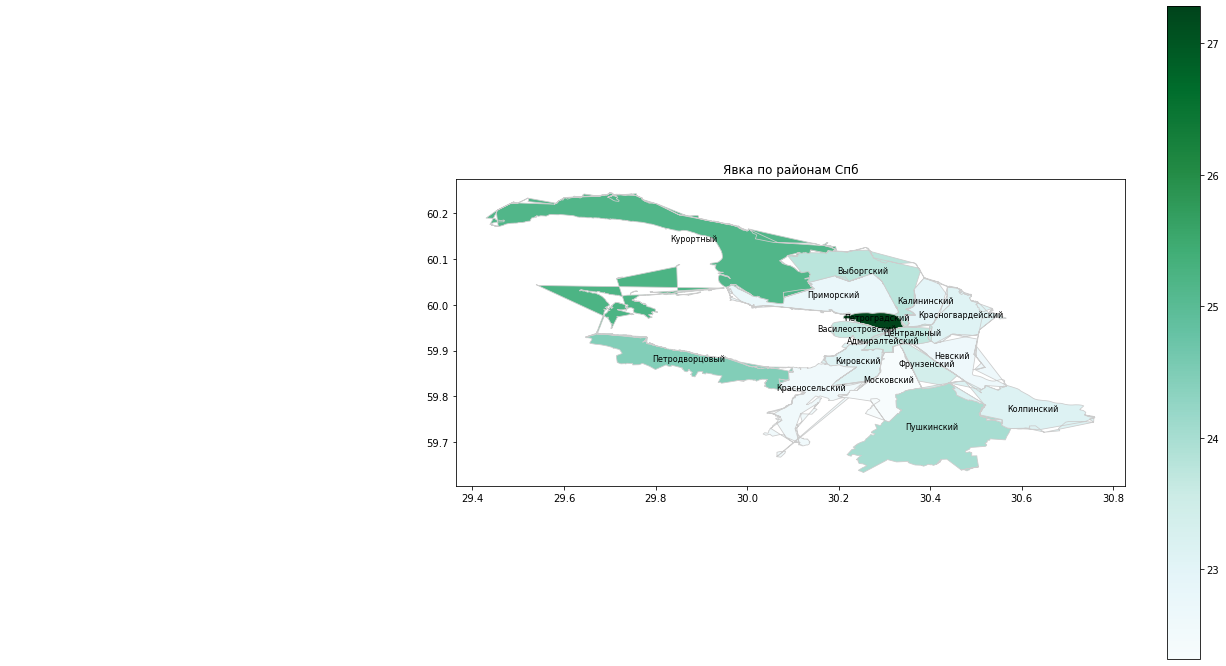

In [79]:
fig, ax = plt.subplots(1, figsize=(15, 12))

disctict_geodf.apply(
    lambda x: ax.annotate(
        s=x.distr_names , 
        xy= (x.geometry.centroid.coords[0][0] , x.geometry.centroid.coords[0][1]),
        ha='center',
        fontsize=8),axis=1);

disctict_geodf.plot(column='yavka', cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')
vmin, vmax = min(disctict_geodf['yavka'].values), min(disctict_geodf['yavka'].values)
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)
ax.set_title('Явка по районам Спб')

Text(0.5, 1.0, 'Победители по районам Спб')

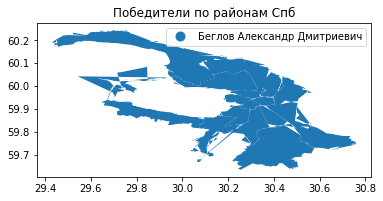

In [50]:
disctict_geodf.plot(column='winner', categorical=True, legend=True)
# так как электронное голосование не содержит точек и нельзя построить полигон для него, то его данные не указаны.
# но именно на нём победу одержал другой кандидат
plt.title('Победители по районам Спб')

c:\users\admin\anaconda3\envs\date2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


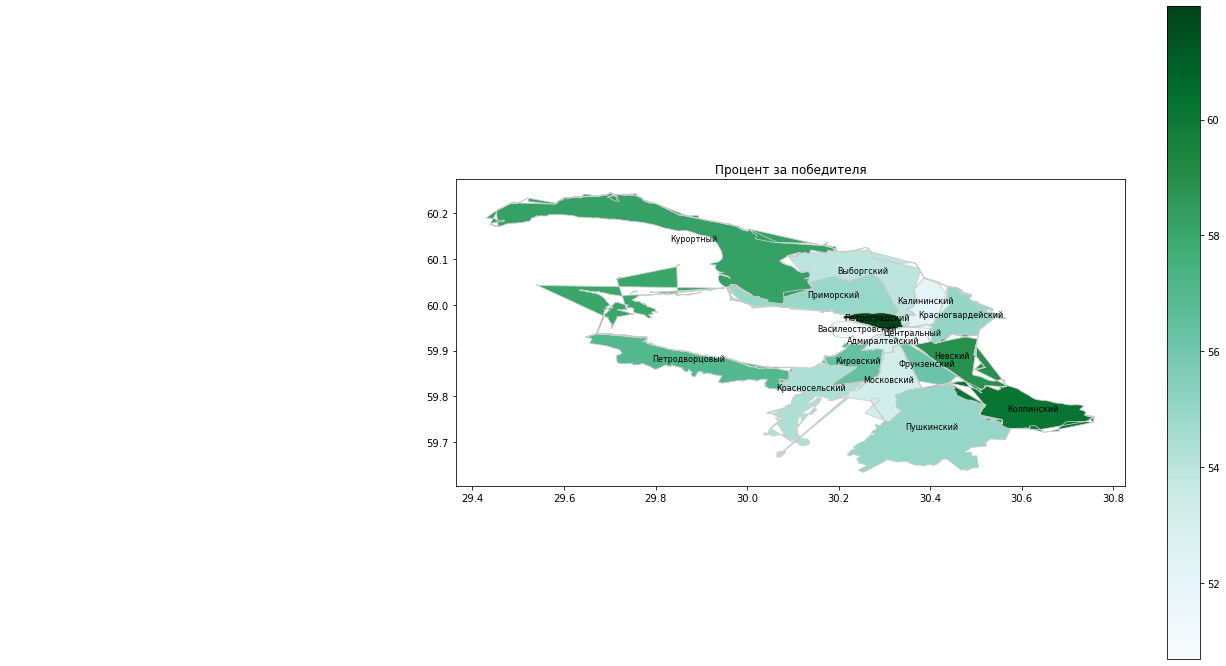

In [78]:

fig, ax = plt.subplots(1, figsize=(15, 12))

disctict_geodf.apply(
    lambda x: ax.annotate(
        s=x.distr_names , 
        xy= (x.geometry.centroid.coords[0][0] , x.geometry.centroid.coords[0][1]),
        ha='center',
        fontsize=8),axis=1);

disctict_geodf.plot(column='perc_win', cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')
vmin, vmax = min(disctict_geodf['perc_win'].values), min(disctict_geodf['perc_win'].values)
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)
ax.set_title('Процент за победителя')
plt.show()

### По приведенным графикам обнаружены аномалии высокой явки в Петроградском районе города Спб. Также победа не Беглова в электронном голосовании. И очень высокий процент за победителя в Петроградском районе